In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## **Statistical Analysis**

In [3]:
df = pd.read_csv('Walmart DataSet.csv')

In [4]:
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB
None
             Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000

In [5]:
print(df.isnull().sum())

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


In [6]:
print("Descriptive Statistics:")
print(df[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].describe())

Descriptive Statistics:
       Weekly_Sales  Temperature   Fuel_Price          CPI  Unemployment
count  6.435000e+03  6435.000000  6435.000000  6435.000000   6435.000000
mean   1.046965e+06    60.663782     3.358607   171.578394      7.999151
std    5.643666e+05    18.444933     0.459020    39.356712      1.875885
min    2.099862e+05    -2.060000     2.472000   126.064000      3.879000
25%    5.533501e+05    47.460000     2.933000   131.735000      6.891000
50%    9.607460e+05    62.670000     3.445000   182.616521      7.874000
75%    1.420159e+06    74.940000     3.735000   212.743293      8.622000
max    3.818686e+06   100.140000     4.468000   227.232807     14.313000


In [7]:
# Correlation analysis
correlation_matrix = df[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].corr()
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
              Weekly_Sales  Temperature  Fuel_Price       CPI  Unemployment
Weekly_Sales      1.000000    -0.063810    0.009464 -0.072634     -0.106176
Temperature      -0.063810     1.000000    0.144982  0.176888      0.101158
Fuel_Price        0.009464     0.144982    1.000000 -0.170642     -0.034684
CPI              -0.072634     0.176888   -0.170642  1.000000     -0.302020
Unemployment     -0.106176     0.101158   -0.034684 -0.302020      1.000000


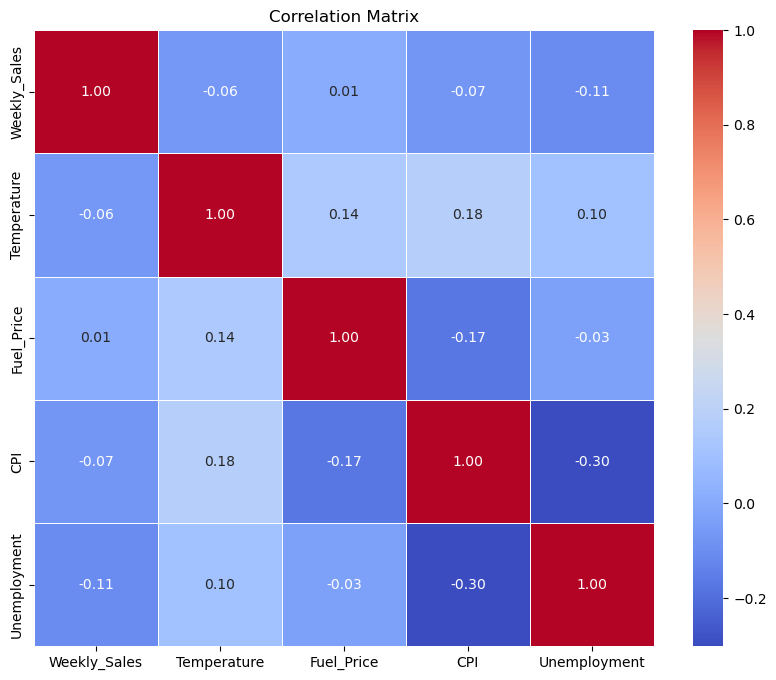

In [8]:
# Visualize correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [9]:
# Holiday effect analysis
holiday_sales = df.groupby('Holiday_Flag')['Weekly_Sales'].mean()
print("Average Weekly Sales by Holiday Flag:")
print(holiday_sales)

Average Weekly Sales by Holiday Flag:
Holiday_Flag
0    1.041256e+06
1    1.122888e+06
Name: Weekly_Sales, dtype: float64


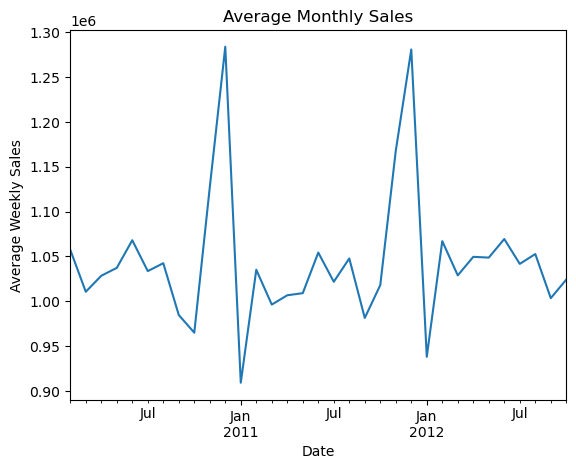

In [10]:
# Seasonality analysis
# Assuming the 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'], format="%d-%m-%Y")
df.set_index('Date', inplace=True)
df.resample('M')['Weekly_Sales'].mean().plot()
plt.title('Average Monthly Sales')
plt.xlabel('Date')
plt.ylabel('Average Weekly Sales')
plt.show()

In [11]:
# Store-wise analysis
store_sales = df.groupby('Store')['Weekly_Sales'].mean()
print("Average Weekly Sales by Store:")
print(store_sales)

Average Weekly Sales by Store:
Store
1     1.555264e+06
2     1.925751e+06
3     4.027044e+05
4     2.094713e+06
5     3.180118e+05
6     1.564728e+06
7     5.706173e+05
8     9.087495e+05
9     5.439806e+05
10    1.899425e+06
11    1.356383e+06
12    1.009002e+06
13    2.003620e+06
14    2.020978e+06
15    6.233125e+05
16    5.192477e+05
17    8.935814e+05
18    1.084718e+06
19    1.444999e+06
20    2.107677e+06
21    7.560691e+05
22    1.028501e+06
23    1.389864e+06
24    1.356755e+06
25    7.067215e+05
26    1.002912e+06
27    1.775216e+06
28    1.323522e+06
29    5.394514e+05
30    4.385796e+05
31    1.395901e+06
32    1.166568e+06
33    2.598617e+05
34    9.667816e+05
35    9.197250e+05
36    3.735120e+05
37    5.189003e+05
38    3.857317e+05
39    1.450668e+06
40    9.641280e+05
41    1.268125e+06
42    5.564039e+05
43    6.333247e+05
44    3.027489e+05
45    7.859814e+05
Name: Weekly_Sales, dtype: float64


## **EDA PART**

In [12]:
print(df.head())

            Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Date                                                                     
2010-02-05      1    1643690.90             0        42.31       2.572   
2010-02-12      1    1641957.44             1        38.51       2.548   
2010-02-19      1    1611968.17             0        39.93       2.514   
2010-02-26      1    1409727.59             0        46.63       2.561   
2010-03-05      1    1554806.68             0        46.50       2.625   

                   CPI  Unemployment  
Date                                  
2010-02-05  211.096358         8.106  
2010-02-12  211.242170         8.106  
2010-02-19  211.289143         8.106  
2010-02-26  211.319643         8.106  
2010-03-05  211.350143         8.106  


In [13]:
# Data exploration
print("Dataset information:")
print(df.info())

Dataset information:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6435 entries, 2010-02-05 to 2012-10-26
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Weekly_Sales  6435 non-null   float64
 2   Holiday_Flag  6435 non-null   int64  
 3   Temperature   6435 non-null   float64
 4   Fuel_Price    6435 non-null   float64
 5   CPI           6435 non-null   float64
 6   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 402.2 KB
None


In [14]:
# Summary statistics
print("Summary statistics:")
print(df.describe())

Summary statistics:
             Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.533501e+05      0.000000    47.460000     2.933000   
50%      23.000000  9.607460e+05      0.000000    62.670000     3.445000   
75%      34.000000  1.420159e+06      0.000000    74.940000     3.735000   
max      45.000000  3.818686e+06      1.000000   100.140000     4.468000   

               CPI  Unemployment  
count  6435.000000   6435.000000  
mean    171.578394      7.999151  
std      39.356712      1.875885  
min     126.064000      3.879000  
25%     131.735000      6.891000  
50%     182.616521      7.874000  
75%     212.743293      8.622000  
max     227.232

In [15]:
# Check for missing values
print("Missing values:")
print(df.isnull().sum())

Missing values:
Store           0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


In [16]:
# Unique values in categorical columns
print("Unique values in 'Holiday_Flag':", df['Holiday_Flag'].unique())
print("Unique values in 'Store':", df['Store'].unique())

Unique values in 'Holiday_Flag': [0 1]
Unique values in 'Store': [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]


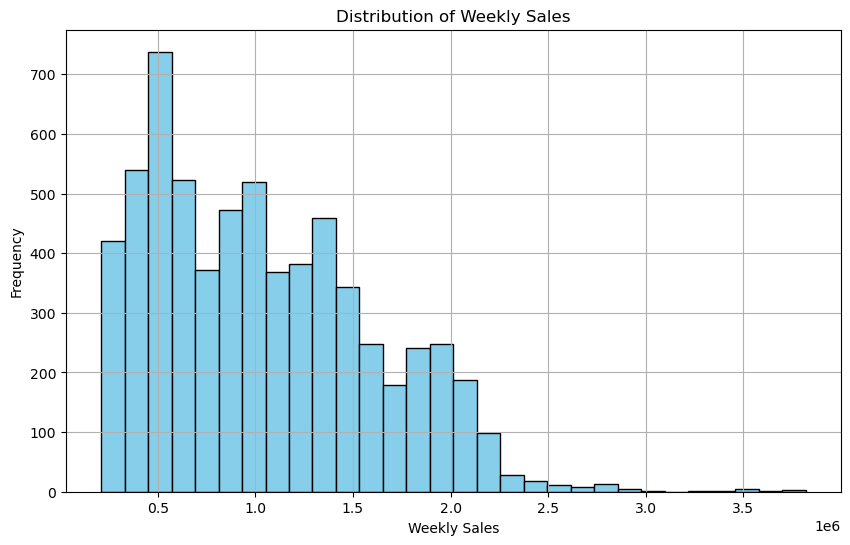

In [17]:
# Visualizations
# Histogram of Weekly_Sales
plt.figure(figsize=(10, 6))
plt.hist(df['Weekly_Sales'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Weekly Sales')
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

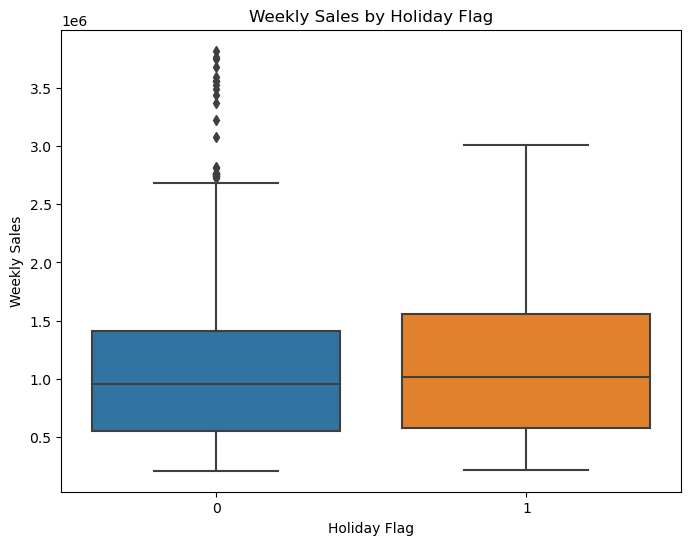

In [18]:
# Boxplot of Weekly_Sales by Holiday_Flag
plt.figure(figsize=(8, 6))
sns.boxplot(x='Holiday_Flag', y='Weekly_Sales', data=df)
plt.title('Weekly Sales by Holiday Flag')
plt.xlabel('Holiday Flag')
plt.ylabel('Weekly Sales')
plt.show()

C:\Users\welcome\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


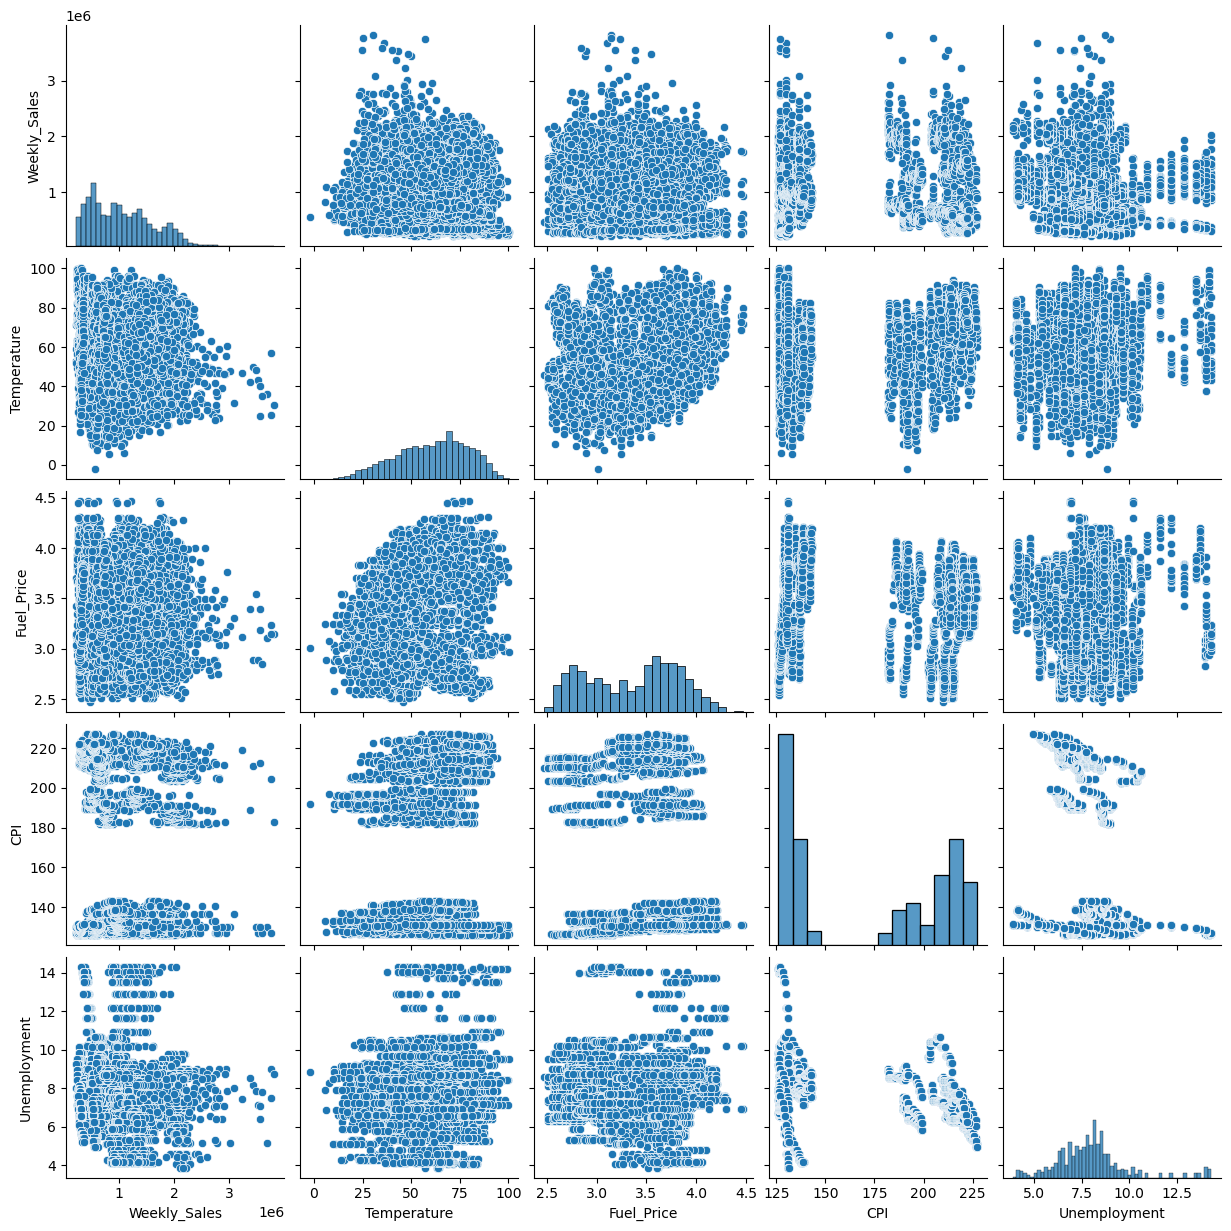

In [19]:
# Pairplot for numerical variables
sns.pairplot(df[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']])
plt.show()

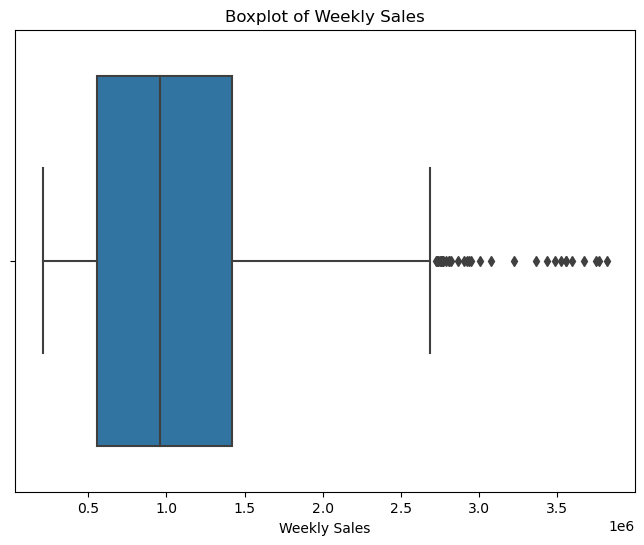

In [20]:
# Boxplot of Weekly_Sales
plt.figure(figsize=(8, 6))
sns.boxplot(x='Weekly_Sales', data=df)
plt.title('Boxplot of Weekly Sales')
plt.xlabel('Weekly Sales')
plt.show()


In [21]:
# Calculate Z-score to identify outliers
from scipy.stats import zscore
z_scores = zscore(df['Weekly_Sales'])
outliers = df[(z_scores > 3) | (z_scores < -3)]
print("Number of outliers detected using Z-score method:", len(outliers))

Number of outliers detected using Z-score method: 31


In [22]:
# Calculate IQR to identify outliers
Q1 = df['Weekly_Sales'].quantile(0.25)
Q3 = df['Weekly_Sales'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_iqr = df[(df['Weekly_Sales'] < lower_bound) | (df['Weekly_Sales'] > upper_bound)]
print("Number of outliers detected using IQR method:", len(outliers_iqr))

Number of outliers detected using IQR method: 34


## **Part 1: Question**

In [37]:
# Impute missing values
df['Unemployment'].fillna(df['Unemployment'].median(), inplace=True)
df['Temperature'].fillna(df['Temperature'].median(), inplace=True)
df['CPI'].fillna(df['CPI'].median(), inplace=True)

In [24]:

# a. Effect of Unemployment Rate on Weekly Sales
unemployment_sales_corr = df.groupby('Store')[['Unemployment', 'Weekly_Sales']].corr().iloc[0::2,-1].reset_index()
stores_most_affected = unemployment_sales_corr.loc[unemployment_sales_corr['Weekly_Sales'] < -0.5, 'Store']
print("Stores suffering the most due to unemployment rate:")
print(stores_most_affected)


Stores suffering the most due to unemployment rate:
37    38
43    44
Name: Store, dtype: int64


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [27]:
# Load the dataset
df = pd.read_csv('Walmart DataSet.csv')

In [28]:
print(df['Date'].head())

0    05-02-2010
1    12-02-2010
2    19-02-2010
3    26-02-2010
4    05-03-2010
Name: Date, dtype: object


In [29]:
df = df[pd.to_datetime(df['Date'], errors='coerce').notnull()]

In [30]:
df['Date'] = pd.to_datetime(df['Date'], format='mixed')

In [31]:
# b. Seasonal Trend in Weekly Sales
df['Month'] = df['Date'].dt.month
seasonal_sales = df.groupby('Month')['Weekly_Sales'].mean().reset_index()
print("Seasonal trend in weekly sales:")
print(seasonal_sales)

Seasonal trend in weekly sales:
    Month  Weekly_Sales
0       1  1.008661e+06
1       2  1.070976e+06
2       3  1.064208e+06
3       4  1.062676e+06
4       5  1.057717e+06
5       6  1.087901e+06
6       7  1.037893e+06
7       8  1.047227e+06
8       9  1.089198e+06
9      10  1.095039e+06
10     11  1.045290e+06
11     12  1.034511e+06


In [32]:
# c. Effect of Temperature on Weekly Sales
temperature_sales_corr = df[['Temperature', 'Weekly_Sales']].corr().iloc[0, 1]
print("Correlation between temperature and weekly sales:", temperature_sales_corr)

Correlation between temperature and weekly sales: -0.03462005304495357


In [33]:
# d. Impact of Consumer Price Index (CPI) on Weekly Sales
cpi_sales_corr = df.groupby('Store')[['CPI', 'Weekly_Sales']].corr().iloc[0::2,-1].reset_index()
print("Correlation between CPI and weekly sales:")
print(cpi_sales_corr)

Correlation between CPI and weekly sales:
    Store level_1  Weekly_Sales
0       1     CPI      0.556828
1       2     CPI     -0.090861
2       3     CPI      0.401986
3       4     CPI      0.698993
4       5     CPI      0.546161
5       6     CPI      0.044291
6       7     CPI      0.365342
7       8     CPI      0.276445
8       9     CPI      0.583091
9      10     CPI     -0.135886
10     11     CPI      0.193886
11     12     CPI      0.196342
12     13     CPI      0.351795
13     14     CPI     -0.504377
14     15     CPI     -0.280457
15     16     CPI      0.169314
16     17     CPI      0.350108
17     18     CPI     -0.292142
18     19     CPI     -0.259699
19     20     CPI      0.172698
20     21     CPI     -0.274059
21     22     CPI     -0.052858
22     23     CPI      0.183396
23     24     CPI      0.069413
24     25     CPI      0.024449
25     26     CPI      0.294095
26     27     CPI     -0.239414
27     28     CPI     -0.019682
28     29     CPI     -0.11341

In [34]:
# e. Top Performing Stores
top_stores = df.groupby('Store')['Weekly_Sales'].mean().nlargest(5)
print("Top performing stores according to historical data:")
print(top_stores)


Top performing stores according to historical data:
Store
20    2.169370e+06
4     2.088557e+06
14    2.075189e+06
13    1.998168e+06
2     1.951955e+06
Name: Weekly_Sales, dtype: float64


In [35]:
# f. Worst Performing Store and Sales Variability
worst_store = df.groupby('Store')['Weekly_Sales'].mean().idxmin()
print("Worst performing store:", worst_store)

Worst performing store: 33


In [36]:
# Calculate the difference between highest and lowest performing stores
max_sales = df.groupby('Store')['Weekly_Sales'].mean().max()
min_sales = df.groupby('Store')['Weekly_Sales'].mean().min()
sales_difference = max_sales - min_sales
print("Difference between highest and lowest performing stores:", sales_difference)


Difference between highest and lowest performing stores: 1902031.4803508772


## **Part 2 : Question**

In [68]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import itertools

In [69]:
# Preprocessing: Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [70]:
# Preprocessing: Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [71]:
# Function to forecast sales for each store using SARIMA
def forecast_sales(data, store):
    # Filter data for the given store
    store_data = data[data['Store'] == store].copy()

    # Resample the data to weekly frequency and fill missing values with mean
    store_data.set_index('Date', inplace=True)
    store_data = store_data.resample('W').mean()
    store_data.fillna(method='ffill', inplace=True)

    # Split data into train and test sets
    train_size = int(len(store_data) * 0.8)
    train_data, test_data = store_data.iloc[:train_size], store_data.iloc[train_size:]

    # Parameter grid search for SARIMA
    p = d = q = range(0, 2)
    seasonal_pdq = [(x[0], x[1], x[2], 52) for x in list(itertools.product(p, d, q))]

    # Grid search to find optimal parameters
    best_aic = np.inf
    best_params = None
    for param in seasonal_pdq:
        try:
            mod = SARIMAX(train_data['Weekly_Sales'], order=(1, 1, 1), seasonal_order=param,
                          enforce_stationarity=False, enforce_invertibility=False)
            results = mod.fit()
            if results.aic < best_aic:
                best_aic = results.aic
                best_params = param
        except:
            continue

    # Fit SARIMA model with best parameters
    model = SARIMAX(train_data['Weekly_Sales'], order=(1, 1, 1), seasonal_order=best_params,
                    enforce_stationarity=False, enforce_invertibility=False)
    fitted_model = model.fit()

    # Forecast sales for the next 12 weeks
    forecast = fitted_model.forecast(steps=12)

    return forecast

# Forecast sales for each store for the next 12 weeks
forecast_results = {}
for store_num in df['Store'].unique():
    forecast_results[store_num] = forecast_sales(df, store_num)

# Print forecast results for each store
for store_num, sales_forecast in forecast_results.items():
    print(f"Forecast for Store {store_num} for the next 12 weeks:")
    print(sales_forecast)




/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimat

Forecast for Store 1 for the next 12 weeks:
2012-05-20    1.671305e+06
2012-05-27    1.671463e+06
2012-06-03    1.671953e+06
2012-06-10    1.676281e+06
2012-06-17    1.676286e+06
2012-06-24    1.676279e+06
2012-07-01    1.660084e+06
2012-07-08    1.676297e+06
2012-07-15    1.676306e+06
2012-07-22    1.676307e+06
2012-07-29    1.676301e+06
2012-08-05    1.671339e+06
Freq: W-SUN, Name: predicted_mean, dtype: float64
Forecast for Store 2 for the next 12 weeks:
2012-05-20    1.991480e+06
2012-05-27    1.990289e+06
2012-06-03    1.990603e+06
2012-06-10    1.989851e+06
2012-06-17    1.989845e+06
2012-06-24    1.989843e+06
2012-07-01    1.990910e+06
2012-07-08    1.989161e+06
2012-07-15    1.989164e+06
2012-07-22    1.989164e+06
2012-07-29    1.989164e+06
2012-08-05    1.988988e+06
Freq: W-SUN, Name: predicted_mean, dtype: float64
Forecast for Store 3 for the next 12 weeks:
2012-05-20    443020.031300
2012-05-27    442794.010436
2012-06-03    443036.548183
2012-06-10    440936.818972
2012-06-